<a href="https://colab.research.google.com/github/21800040/Kwon_Jihyun/blob/master/Deagu_PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/21800040/Kwon_Jihyun.git

Cloning into 'Kwon_Jihyun'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import operator



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def file2matrix(filename):
  file = open(filename)
  n = len(file.readlines())
  return_matrix = np.zeros((n,3))
  class_labals = []
  file = open(filename)
  index = 0
  for line in file.readlines():
    line = line.strip()
    tokens = line.split('\t')
    return_matrix[index, :] = tokens[0:3]
    class_labels.append(tokens[-1])

In [5]:
df_2 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_2.csv')
df_3 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_3.csv')
df_4 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_4.csv')
PatientInfo = pd.read_csv('/content/drive/My Drive/COVID-19/PatientInfo.csv')



PatientInfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
#대구확진자 데이터 필터링

patient = PatientInfo.loc[:,['province' ,'confirmed_date']]
patient.head(10)

is_deagu = patient['province'] == 'Daegu'
final_patient = patient[is_deagu]
final_patient

#날짜별 확진자 수 구해서 새로운 열 생성
confirmed_num = final_patient.groupby('confirmed_date').size()

confirmed_daegu = pd.DataFrame(confirmed_num)
confirmed_daegu

#patient = pd.DataFrame({'' : confirmed_num})


,0
confirmed_date,
2020-02-18,6
2020-02-19,20
2020-02-20,18
2020-02-21,1
2020-02-24,1
2020-02-25,1
2020-02-26,1
2020-02-27,2
2020-02-28,3


In [7]:
df_total = pd.concat([df_2, df_3, df_4]) 
df_total.head(5)

,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2020-02-29,24.0,20.0,30.0,20.0,15.0,24.0,16.0,27.0,22.0,30.0,33.0,20.0,17.0,23.0,21.0,16.0,34.0
1,2020-02-28,25.0,21.0,26.0,28.0,20.0,23.0,21.0,31.0,22.0,26.0,38.0,29.0,18.0,22.0,24.0,19.0,30.0
2,2020-02-27,13.0,16.0,14.0,15.0,42.0,28.0,15.0,21.0,13.0,27.0,41.0,43.0,35.0,15.0,20.0,35.0,35.0
3,2020-02-26,18.0,19.0,19.0,17.0,14.0,19.0,19.0,19.0,12.0,20.0,23.0,17.0,15.0,18.0,17.0,26.0,23.0
4,2020-02-25,20.0,12.0,15.0,20.0,23.0,10.0,12.0,20.0,21.0,20.0,19.0,13.0,23.0,16.0,12.0,50.0,23.0


In [21]:
df_sample_daegu = df_total.loc[:,['날짜','대구']]
df_sample_seoul = df_total.loc[:,['날짜','서울']]

df_sample_seoul.head(10)

,날짜,서울
0,2020-02-29,24.0
1,2020-02-28,25.0
2,2020-02-27,13.0
3,2020-02-26,18.0
4,2020-02-25,20.0
5,2020-02-24,35.0
6,2020-02-23,23.0
7,2020-02-22,72.0
8,2020-02-21,59.0
9,2020-02-20,58.0


Text(0, 0.5, 'PM')

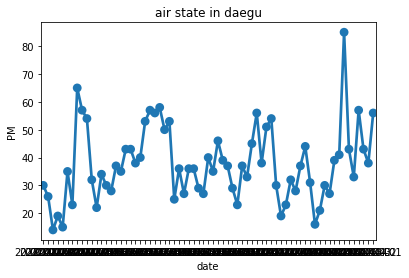

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pointplot(data = df_sample_daegu ,x = '날짜', y = '대구')

plt.title('air state in daegu')
plt.xlabel('date')
plt.ylabel('PM')


Text(0, 0.5, 'PM')

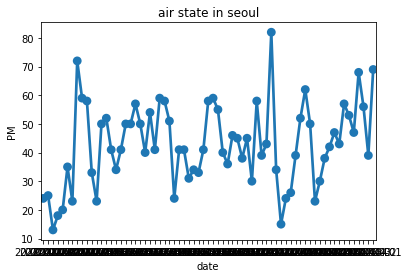

In [26]:

sns.pointplot(data = df_sample_seoul ,x = '날짜', y = '서울')

plt.title('air state in seoul')
plt.xlabel('date')
plt.ylabel('PM')


In [10]:
#확진자 데이터 처리부분 수정필요
'''
sns.pointplot(data = patient , x = 'confirmed_date', y = 'total')


plt.title('confirmed rate')
plt.xlabel('date')
plt.ylabel('confirmed num')
'''

"\nsns.pointplot(data = patient , x = 'confirmed_date', y = 'total')\n\n\nplt.title('confirmed rate')\nplt.xlabel('date')\nplt.ylabel('confirmed num')\n"

In [11]:
#수정필요
'''
pd.merge(patient, df_total, left_on = 'date', right_on = '날짜' ) #확진자 데이터와 지역별 미세먼지 수치를 단순히 병합시킨 것
'''

"\npd.merge(patient, df_total, left_on = 'date', right_on = '날짜' ) #확진자 데이터와 지역별 미세먼지 수치를 단순히 병합시킨 것\n"

In [12]:
'''
comb_data = pd.merge(patient, df_total.rename(columns = {'날짜':'date'})) #확진자 데이터와 지역별 미세먼지 수치를 겹치는 날짜로  병합시킨 것

#필요없는 열 제거
fix_comb_data = comb_data.loc[:,['date' ,'confirmed','대구']]
fix_comb_data.head(10)
'''
#수정필요

"\ncomb_data = pd.merge(patient, df_total.rename(columns = {'날짜':'date'})) #확진자 데이터와 지역별 미세먼지 수치를 겹치는 날짜로  병합시킨 것\n\n#필요없는 열 제거\nfix_comb_data = comb_data.loc[:,['date' ,'confirmed','대구']]\nfix_comb_data.head(10)\n"

Text(0, 0.5, 'rate')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


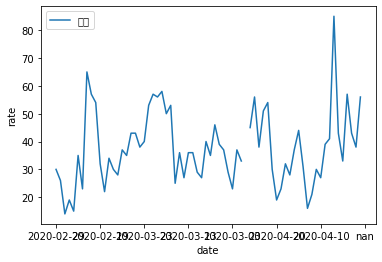

In [29]:
#미세먼지 정도
df_total.plot('날짜', '대구')

plt.xlabel('date')
plt.ylabel('rate')



Text(0, 0.5, 'rate')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0, flags=flags)


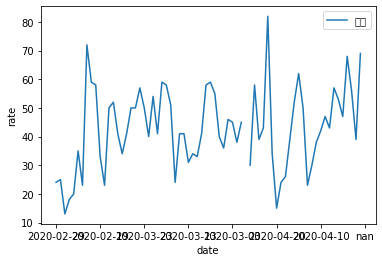

In [30]:
df_total.plot('날짜', '서울')

plt.xlabel('date')
plt.ylabel('rate')

In [0]:
'''
#공기상태 수치와 확진자수를 날짜별로 같이 합친 데이터로 그래프 그리기
#수치차이가 많이 나기 때문에 합쳤을 때는 둘 간의 비교가 어려움
fix_comb_data.plot()

plt.xlabel('date')
plt.ylabel('rate')

plt.title('The relationship between air pollution and corona in Deagu')
plt.legend(['confirmed','PM']) #PM은 미세먼지수치를 지칭
plt.show()
''' 
#수정필요
